In [2]:
import pandas as pd
import os, re 
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import seaborn as sns 

In [7]:
PARAM_STR = "thr3_prev0.3_cecal"
transformed_data_path = "formatted_output/transformed/{0}".format(PARAM_STR)
figures_dir = "figures/{0}".format(PARAM_STR)

bpm_filt_data_path = "formatted_output/bpm_filtered/{0}".format(PARAM_STR)
bpm_filt_log_fpath = "{0}/bpm_filt_log.csv".format(bpm_filt_data_path)
pht_agg_log_fpath = "{0}/bpm1_agg_pht_log.csv".format(bpm_filt_data_path)
condensed_agg_log_fpath = "{0}/condensed_agg_pht_log.csv".format(bpm_filt_data_path)

bpm_filt_log_df = pd.read_csv(bpm_filt_log_fpath,index_col=0)
pht_agg_log_df = pd.read_csv(pht_agg_log_fpath,index_col=0)
condensed_agg_log_df = pd.read_csv(condensed_agg_log_fpath,index_col=0)
print("Pre-filtering:")
display(bpm_filt_log_df)
display(condensed_agg_log_df)

#Cecal contents only filtering 
cecal_filter = True 
if cecal_filter:
    cecal_bpm_filt_log_df = bpm_filt_log_df.loc[:,bpm_filt_log_df.columns.str.contains("cecal")]
    bpm_filt_log_df = cecal_bpm_filt_log_df
    
    cecal_condensed_agg_df = condensed_agg_log_df.loc[:,condensed_agg_log_df.columns.str.contains("cecal")]
    condensed_agg_log_df = cecal_condensed_agg_df

drop_prevotella = True 
if drop_prevotella:
    bpm_filt_log_df = bpm_filt_log_df.loc[~bpm_filt_log_df.index.str.contains(r'NBCBLOMG|NJCFFJJN'),:]
    condensed_agg_log_df = condensed_agg_log_df.loc[~condensed_agg_log_df.index.str.contains(r'Pst|Pco'),:]


feature_center = True
if feature_center:
    bpm_filt_log_df = bpm_filt_log_df.subtract(bpm_filt_log_df.mean(axis=1),axis=0)
    condensed_agg_log_df = condensed_agg_log_df.subtract(condensed_agg_log_df.mean(axis=1),axis=0)
    
assert(np.isclose(bpm_filt_log_df.mean(axis=1).sum(),0))
assert(np.isclose(condensed_agg_log_df.mean(axis=1).sum(),0))

#Convert so that samples are rows, features are columns (ie tranpose of previous data format)
data_tranpose = True 
if data_tranpose:
    if not bpm_filt_log_df.index.str.contains("cecal").sum():
        bpm_filt_log_df = bpm_filt_log_df.transpose()
    if not condensed_agg_log_df.index.str.contains("cecal").sum():
        condensed_agg_log_df = condensed_agg_log_df.transpose()
print("Post Filtering/Transpose")
display(bpm_filt_log_df)
display(condensed_agg_log_df)
        
        
print("==BPM=1 Transcripts STD==")        
display(bpm_filt_log_df.std(axis=0))
print("==BPM=1 Phenotypes STD==")        
display(condensed_agg_log_df.std(axis=0))

Pre-filtering:


,Pup_1.cecal_contents_53_1C_Pup_1,Pup_2.cecal_contents_53_1C_Pup_2,Pup_3.cecal_contents_53_1C_Pup_3,Pup_4.cecal_contents_53_1C_Pup_4,Pup_5.cecal_contents_53_1C_Pup_5,Pup_6.cecal_contents_53_1C_Pup_6,Pup_7.cecal_contents_53_1C_Pup_7,Pup_8.cecal_contents_53_1C_Pup_8,Pup_1.cecal_contents_54_2A_Pup_1,Pup_2.cecal_contents_54_2A_Pup_2,Pup_3.cecal_contents_54_2A_Pup_3,Pup_4.cecal_contents_54_2A_Pup_4,Pup_5.cecal_contents_54_2A_Pup_5,Pup_6.cecal_contents_54_2A_Pup_6,Pup_7.cecal_contents_54_2A_Pup_7
ANCJAENF_00439,8.840905,6.968066,9.308339,10.016583,9.213526,9.294304,8.711096,8.068249,-1.559526,8.396362,-1.439511,-1.498340,6.539369,-0.423020,1.146059
ANCJAENF_00597,7.380573,4.569327,7.994044,8.591325,7.891833,7.507954,7.289607,6.552103,-2.762544,5.449730,-0.337060,-2.679099,4.611609,-2.781970,0.464255
ANCJAENF_01803,7.817482,6.210038,9.087841,9.622405,8.611811,9.719440,7.982809,7.970149,-1.631772,9.840556,-1.509198,0.204759,8.532686,-1.646236,-1.896824
ANCJAENF_01805,11.153499,9.286293,11.477274,12.329538,11.674919,12.382433,12.490460,7.403960,2.182699,7.408465,2.193380,2.560661,6.305510,2.181523,2.305230
ANCJAENF_01808,10.736404,9.256393,11.292206,12.499093,11.646017,12.577587,12.393531,6.949811,1.991872,7.187404,2.004033,1.997896,5.589836,1.990531,1.970146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LDOIJNDB_01949,8.329017,8.244440,9.099212,9.304175,8.017818,8.155694,8.209266,9.670672,5.269446,10.129730,7.342387,6.657651,9.287000,7.978503,8.154249
LDOIJNDB_00521,12.685889,13.514350,13.855387,15.101286,13.371092,14.230535,13.719989,14.295174,9.502605,14.595401,11.135678,10.748094,13.674275,12.021826,12.251474
LDOIJNDB_00521,12.685889,13.514350,13.855387,15.101286,13.371092,14.230535,13.719989,14.295174,9.502605,14.595401,11.135678,10.748094,13.674275,12.021826,12.251474
LDOIJNDB_01036,6.692504,7.601360,7.647801,8.277617,7.051229,7.726390,7.670658,8.487496,2.449276,8.898755,4.716955,4.237488,6.934289,5.424663,5.721194


,Pup_1.cecal_contents_53_1C_Pup_1,Pup_2.cecal_contents_53_1C_Pup_2,Pup_3.cecal_contents_53_1C_Pup_3,Pup_4.cecal_contents_53_1C_Pup_4,Pup_5.cecal_contents_53_1C_Pup_5,Pup_6.cecal_contents_53_1C_Pup_6,Pup_7.cecal_contents_53_1C_Pup_7,Pup_8.cecal_contents_53_1C_Pup_8,Pup_1.cecal_contents_54_2A_Pup_1,Pup_2.cecal_contents_54_2A_Pup_2,Pup_3.cecal_contents_54_2A_Pup_3,Pup_4.cecal_contents_54_2A_Pup_4,Pup_5.cecal_contents_54_2A_Pup_5,Pup_6.cecal_contents_54_2A_Pup_6,Pup_7.cecal_contents_54_2A_Pup_7
Bbr_Glc,8.110739,5.768696,8.651191,9.303954,8.552680,8.401129,8.000351,7.310176,-2.161035,6.923046,-0.888286,-2.088720,5.575489,-1.602495,0.805157
Bbr_NANA,10.728599,8.929574,11.154357,12.138482,11.352730,12.241818,11.964851,6.804232,1.413088,7.401708,1.448034,1.685604,6.092972,1.409074,1.360721
Bbr_Fuc,10.452288,8.248328,10.701618,11.923470,11.149268,11.860591,10.437705,9.647614,1.850924,11.027559,3.678324,2.483670,9.035083,2.686559,4.274589
Bbr_Mal,10.121947,7.345751,10.424477,11.354665,10.524519,10.980949,10.041803,10.796618,1.237629,10.925098,1.489564,1.296513,7.790072,1.291616,1.072529
Bbr_Lnb,9.082675,5.431336,9.451298,9.651332,9.069571,9.311619,8.473590,8.295212,-0.007111,8.758887,1.424776,-0.457874,8.600437,1.989530,2.762597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spa_Acetate,9.360489,8.953866,10.092261,9.104101,8.838904,8.064616,9.723560,10.905904,5.533994,9.964741,7.480334,6.884225,9.291123,7.916445,8.239937
Spa_Formate,9.870340,10.244037,11.090569,10.507182,9.946328,9.766417,10.594649,11.957651,6.215359,12.111002,7.947193,7.733296,10.454746,8.611711,8.786426
Spa_L-Lactate,8.329017,8.244440,9.099212,9.304175,8.017818,8.155694,8.209266,9.670672,5.269446,10.129730,7.342387,6.657651,9.287000,7.978503,8.154249
Spa_Ethanol,10.688094,11.543353,11.786192,12.826730,11.264471,12.062487,11.703545,12.359281,7.151495,12.696519,8.996104,8.577892,11.427613,9.822771,10.074714


Post Filtering/Transpose


,ANCJAENF_00439,ANCJAENF_00597,ANCJAENF_01803,ANCJAENF_01805,ANCJAENF_01808,ANCJAENF_01809,ANCJAENF_01810,ANCJAENF_01810,ANCJAENF_01811,ANCJAENF_01812,...,LDOIJNDB_01767,LDOIJNDB_00635,LDOIJNDB_02060,LDOIJNDB_01022,LDOIJNDB_01273,LDOIJNDB_01949,LDOIJNDB_00521,LDOIJNDB_00521,LDOIJNDB_01036,LDOIJNDB_00003
Pup_1.cecal_contents_53_1C_Pup_1,3.402074,3.397793,2.556419,3.597776,3.397553,4.236302,3.793783,3.793783,4.234259,3.618466,...,0.456413,0.354469,0.985909,-0.106845,0.402605,0.072400,-0.294315,-0.294315,0.056659,0.014479
Pup_2.cecal_contents_53_1C_Pup_2,1.529235,0.586548,0.948975,1.730570,1.917542,2.534250,1.997872,1.997872,2.172092,1.536969,...,-0.844043,0.384944,0.142188,0.688342,0.354810,-0.012177,0.534146,0.534146,0.965515,0.656889
Pup_3.cecal_contents_53_1C_Pup_3,3.869508,4.011265,3.826778,3.921551,3.953356,4.478908,4.026934,4.026934,4.461317,3.938628,...,1.598279,1.324815,1.479108,1.162764,1.573453,0.842594,0.875183,0.875183,1.011956,1.657396
Pup_4.cecal_contents_53_1C_Pup_4,4.577752,4.608546,4.361342,4.773815,5.160242,5.456401,5.131222,5.131222,5.534142,4.959020,...,-0.692703,0.896940,-0.069337,1.137922,0.431520,1.047557,2.121083,2.121083,1.641772,1.795239
Pup_5.cecal_contents_53_1C_Pup_5,3.774695,3.909054,3.350748,4.119196,4.307167,4.774609,4.348079,4.348079,4.722536,4.250977,...,0.593176,0.276808,0.020399,0.076459,0.371276,-0.238799,0.390889,0.390889,0.415384,0.187042
Pup_6.cecal_contents_53_1C_Pup_6,3.855473,3.525175,4.458377,4.826710,5.238736,5.567153,5.073065,5.073065,5.467000,5.629987,...,-0.768757,-0.136209,-1.115159,0.524895,-0.436981,-0.100923,1.250331,1.250331,1.090545,0.896169
Pup_7.cecal_contents_53_1C_Pup_7,3.272266,3.306828,2.721746,4.934737,5.054681,5.493485,5.068571,5.068571,5.513687,5.262879,...,0.776353,1.086156,0.980364,0.756295,0.988083,-0.047351,0.739785,0.739785,1.034813,1.113933
Pup_8.cecal_contents_53_1C_Pup_8,2.629418,2.569324,2.709086,-0.151763,-0.389039,-0.270298,-1.187858,-1.187858,-0.858218,-0.830642,...,2.143452,2.305893,2.125314,2.075791,2.394590,1.414055,1.314970,1.314970,1.851651,2.136581
Pup_1.cecal_contents_54_2A_Pup_1,-6.998356,-6.745323,-6.892835,-5.373024,-5.346979,-6.205000,-5.211247,-5.211247,-5.804851,-5.250565,...,-3.082927,-3.356036,-2.956577,-3.271793,-3.742409,-2.987171,-3.477599,-3.477599,-4.186569,-3.833517
Pup_2.cecal_contents_54_2A_Pup_2,2.957531,1.466951,4.579493,-0.147258,-0.151446,-0.143504,-0.477934,-0.477934,-0.353711,-0.214493,...,1.364531,1.473953,1.074929,2.757905,2.019178,1.873113,1.615197,1.615197,2.262910,2.502207


,Bbr_Glc,Bbr_NANA,Bbr_Fuc,Bbr_Mal,Bbr_Lnb,Bbr_All,Bbr_Mel,Bbr_GOS,Bbr_Leu,Bbr_Ile,...,Spa_Pro,Spa_Gln,Spa_Asp,Spa_B3,Spa_B9,Spa_Acetate,Spa_Formate,Spa_L-Lactate,Spa_Ethanol,Spa_CA_d
Pup_1.cecal_contents_53_1C_Pup_1,3.399934,3.653543,2.488449,3.009031,2.960150,2.536148,3.355080,2.753406,3.324551,3.854955,...,0.695098,0.610586,0.354392,0.766715,0.456413,0.670189,0.147880,0.072400,-0.177324,0.014479
Pup_2.cecal_contents_53_1C_Pup_2,1.057891,1.854518,0.284488,0.232834,-0.691189,2.504591,-1.161337,0.898523,1.142511,0.580140,...,0.515320,0.317999,0.616829,-0.578016,-0.844043,0.263566,0.521576,-0.012177,0.677936,0.656889
Pup_3.cecal_contents_53_1C_Pup_3,3.940387,4.079301,2.737779,3.311561,3.328773,3.899750,3.143557,2.877487,3.746637,4.302227,...,1.420599,1.074650,1.217636,1.922382,1.598279,1.401961,1.368109,0.842594,0.920774,1.657396
Pup_4.cecal_contents_53_1C_Pup_4,4.593149,5.063426,3.959630,4.241748,3.528807,3.673563,3.229838,4.004593,4.142396,4.853396,...,0.282262,1.530980,1.371747,-0.481564,-0.692703,0.413801,0.784721,1.047557,1.961313,1.795239
Pup_5.cecal_contents_53_1C_Pup_5,3.841875,4.277674,3.185429,3.411602,2.947046,2.572427,3.790366,2.879812,3.519559,3.658311,...,0.481677,0.088773,0.351816,0.432341,0.593176,0.148604,0.223867,-0.238799,0.399054,0.187042
Pup_6.cecal_contents_53_1C_Pup_6,3.690324,5.166762,3.896752,3.868032,3.189094,6.515036,2.316902,3.383479,3.646781,3.634020,...,0.281007,0.301685,0.494011,-2.235558,-0.768757,-0.625684,0.043957,-0.100923,1.197069,0.896169
Pup_7.cecal_contents_53_1C_Pup_7,3.289547,4.889794,2.473866,2.928887,2.351065,2.349683,1.420518,1.885461,2.709925,2.961255,...,1.263071,0.677499,0.997436,0.566690,0.776353,1.033260,0.872189,-0.047351,0.838128,1.113933
Pup_8.cecal_contents_53_1C_Pup_8,2.599371,-0.270824,1.683774,3.683701,2.172687,2.816232,1.983219,2.166164,2.718008,2.236885,...,2.189235,2.201541,2.515420,2.122287,2.143452,2.215603,2.235190,1.414055,1.493864,2.136581
Pup_1.cecal_contents_54_2A_Pup_1,-6.871840,-5.661968,-6.112916,-5.875287,-6.129636,-6.646110,-6.888338,-5.933432,-7.080907,-6.953708,...,-4.382262,-3.828619,-4.211834,-3.789357,-3.082927,-3.156306,-3.507101,-2.987171,-3.713922,-3.833517
Pup_2.cecal_contents_54_2A_Pup_2,2.212241,0.326652,3.063720,3.812181,2.636362,1.113897,5.463918,4.271956,2.862523,2.411867,...,1.735705,1.386950,1.663332,2.012103,1.364531,1.274441,2.388541,1.873113,1.831101,2.502207


==BPM=1 Transcripts STD==


ANCJAENF_00439    4.657838
ANCJAENF_00597    4.339950
ANCJAENF_01803    4.902538
ANCJAENF_01805    4.304113
ANCJAENF_01808    4.434124
                    ...   
LDOIJNDB_01949    1.220524
LDOIJNDB_00521    1.573164
LDOIJNDB_00521    1.573164
LDOIJNDB_01036    1.792667
LDOIJNDB_00003    1.855700
Length: 1973, dtype: float64

==BPM=1 Phenotypes STD==


Bbr_Glc          4.478662
Bbr_NANA         4.524849
Bbr_Fuc          3.793735
Bbr_Mal          4.409023
Bbr_Lnb          3.838536
                   ...   
Spa_Acetate      1.376343
Spa_Formate      1.611336
Spa_L-Lactate    1.220524
Spa_Ethanol      1.639110
Spa_CA_d         1.855700
Length: 399, dtype: float64

From np.linalag.svd:
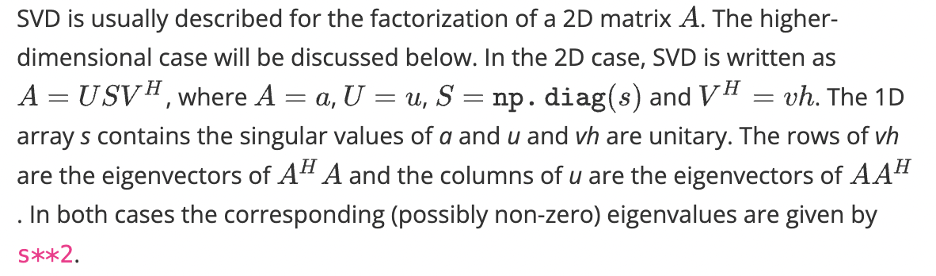

In [8]:
def sv_projections(feature_df,u,s,vh,pc_indices=[0,1],axis=0):
    """Return projections of feature_df onto singular vectors specified by axis 
        feature_df: samples (index) x features (columns)
        u: Matrix of left singular vectors (columns) - n_samples x n_samples
        s: singular values (vector) 
        vh: Matrix of right singular vectors (columns) - n_features x n_features
        pc_indices: list-like of indicies for which singular vectors to generate projections on  
        axis: 0 or 1, for generating sample projections or feature projections respectively 
    """
    #Generate PCs, a len(pc_indices) x {n_samples or n_features} ndarray representing the PCs specified 
    #by pc_indices and axis
    if axis == 0: #sample projections 
        SVs = vh[pc_indices,:]# n_PCs x n_features 
        data = feature_df.values.transpose() #n_features x n_samples
        assert(SVs.shape[1] == data.shape[0])
    elif axis == 1: #feature projections
        SVs = u[:,pc_indices].transpose() #n_PCs x n_samples
        data = feature_df.values #n_samples x n_features 
        assert(SVs.shape[1] == data.shape[0])
    else: 
        raise ValueError("axis must be 0 (sample projections) or 1 (feature projections)")
    #projections = PCs * data
    projections = np.dot(SVs,data)
    return projections
    
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


sklearn.PCA explained variance: [0.91698847 0.0246164 ]


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            34.987275
p-value                     0.00068
number of permutations       100000
Name: PERMANOVA results, dtype: object

,RSV1,RSV2,arm
0,-110.538968,-18.779180,1C
1,-90.612135,-7.056722,1C
2,-115.927914,2.177489,1C
3,-114.664567,7.134403,1C
4,-112.589653,-7.976625,1C
5,-84.295927,26.293116,1C
6,-111.290306,-7.227414,1C
7,-101.158117,10.682206,1C
8,165.638599,-31.363201,2A
9,-108.766456,-12.033008,2A


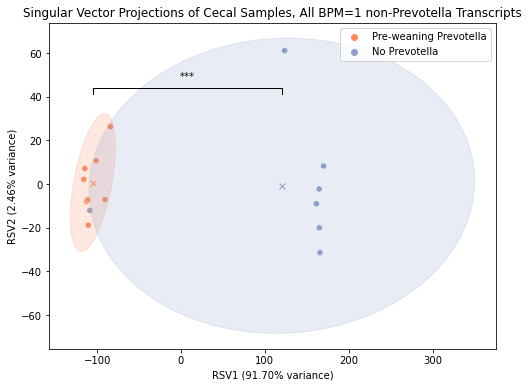

In [9]:
#SVD using log transformed transcript data, BPM1 filtered, non-aggregated
"""
"""
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn.decomposition import PCA
from numpy.linalg import svd 

u,s,vh = svd(bpm_filt_log_df) ##BPM1 filtered transcripts 
#Explained variance calculated from s -> eigenvalues 
eigenvalues = s**2/(len(s)-1)
expl_variance = eigenvalues / np.sum(eigenvalues)

#Sanity check PCA, assert that explained variance isclose  
pca = PCA(n_components=2)
pca.fit(bpm_filt_log_df)
print("sklearn.PCA explained variance: {0}".format(pca.explained_variance_ratio_))
assert(np.isclose(expl_variance[0],pca.explained_variance_ratio_[0]))
assert(np.isclose(expl_variance[1],pca.explained_variance_ratio_[1]))

#Sample and Feature projections
pc_indices = [0,1]
sample_projections = sv_projections(bpm_filt_log_df,u,s,vh,pc_indices=pc_indices)
feature_projections = sv_projections(bpm_filt_log_df,u,s,vh,axis=1,pc_indices=pc_indices)
sample_proj_df = pd.DataFrame(data=sample_projections.T,columns=["RSV1","RSV2"])
sample_proj_df.loc[:,"arm"] = ["1C"]*8 + ["2A"]*7

#PERMANOVA on SV1/SV2 sample projections of data 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))

skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

if skpa["p-value"] < 0.0001: 
    sig_str = "****"
elif skpa["p-value"] < 0.001: 
    sig_str = "***"
elif skpa["p-value"] < 0.01: 
    sig_str = "**"
elif skpa["p-value"] < 0.05: 
    sig_str = "*"
else:
    sig_str = "ns"


display(sample_proj_df)
fig,ax = plt.subplots(1,1,figsize=(8,6))
palette = sns.color_palette("Set2")[1:3]
sns.scatterplot(data=sample_proj_df,x="RSV1",y="RSV2",hue="arm",palette=palette)
ax.set_xlabel("RSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance[pc_indices[0]]*100)))
ax.set_ylabel("RSV{0} ({1}% variance)".format(pc_indices[1]+1,
                                              "%.2f" % (expl_variance[pc_indices[1]]*100)))
#Relabel legend with full study arm descriptions
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["Pre-weaning Prevotella","No Prevotella"])
ax.set_title("Singular Vector Projections of Cecal Samples, All BPM=1 non-Prevotella Transcripts")
#Get sample projections subsetted by arm (1C vs 2A), as well as cluster centers for arm
sample_proj_1C = sample_proj_df.loc[sample_proj_df["arm"] == "1C",:]
center_1C_x, center_1C_y = np.mean(sample_proj_1C["RSV1"]),np.mean(sample_proj_1C["RSV2"])
sample_proj_2A  = sample_proj_df.loc[sample_proj_df["arm"] == "2A",:]
center_2A_x, center_2A_y = np.mean(sample_proj_2A["RSV1"]),np.mean(sample_proj_2A["RSV2"])
#Cluster center markers 
ax.plot(center_1C_x,center_1C_y,c=palette[0],marker='x')
ax.plot(center_2A_x,center_2A_y,c=palette[1],marker='x')
#Confidence ellipses around each cluster - TODO: adjust n_std to correspond to 95% confidence in 2D (1D equiv of .975)
confidence_ellipse(x=sample_proj_1C["RSV1"],y=sample_proj_1C["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[0],facecolor=palette[0],alpha=0.2)
confidence_ellipse(x=sample_proj_2A["RSV1"],y=sample_proj_2A["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[1],facecolor=palette[1],alpha=0.2)
#Significance bracket: x1, x2 = cluster centers (x); y2 = bar y position, y1 = bracket extent 
x1, x2 = center_1C_x, center_2A_x
# y1, y2 = 22, 25 #Hard-coded, fix me 
ymin, ymax = ax.get_ylim()
y2 = ymax - (ymax-ymin)*.2
y1 = y2-(ymax-ymin)*.02
plt.text((x1+x2)*.5, y2+3, sig_str, ha='center', va='bottom', color='k')
plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')

plt.savefig("{0}/bpm1_transcripts_SVD.png".format(figures_dir), dpi=200, facecolor='w',bbox_inches="tight")
# plt.scatter(feature_projections[0,:],feature_projections[1,:])




sklearn.PCA explained variance: [0.91401062 0.0296341 ]


,RSV1,RSV2,arm
0,-50.057960,-7.722222,1C
1,-40.590110,-4.530936,1C
2,-55.922577,0.141531,1C
3,-54.883542,2.840715,1C
4,-50.655175,-1.296996,1C
5,-42.453625,11.592191,1C
6,-49.372896,-3.683131,1C
7,-50.459752,1.904389,1C
8,78.445727,-15.480189,2A
9,-45.524860,-6.337660,2A


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            36.818696
p-value                     0.00038
number of permutations       100000
Name: PERMANOVA results, dtype: object

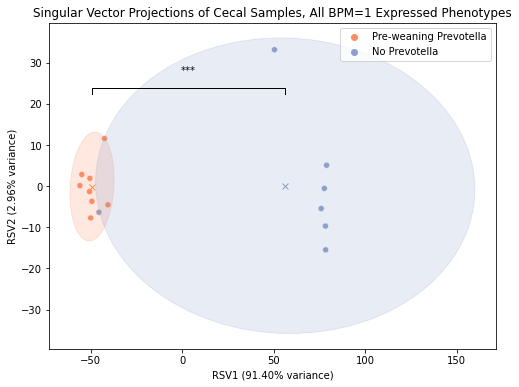

In [10]:
#SVD using log transformed transcript data, BPM=1 filtered, phenotype aggregated  

condensed_agg_log_df_nonna = condensed_agg_log_df.dropna(inplace=True)
# display(condensed_agg_log_df)
u,s,vh = svd(condensed_agg_log_df,full_matrices=True)
#Explained variance calculated from s -> eigenvalues 
eigenvalues = s**2/(len(s)-1)
expl_variance = eigenvalues / np.sum(eigenvalues)
# print(expl_variance)
#Sanity check PCA, assert that explained variance isclose  
pca = PCA(n_components=2)
pca.fit(condensed_agg_log_df)
print("sklearn.PCA explained variance: {0}".format(pca.explained_variance_ratio_))
assert(np.isclose(expl_variance[0],pca.explained_variance_ratio_[0]))
assert(np.isclose(expl_variance[1],pca.explained_variance_ratio_[1]))

#Sample and Feature projections
pc_indices = [0,1]
sample_projections = sv_projections(condensed_agg_log_df,u,s,vh,pc_indices=pc_indices)
feature_projections = sv_projections(condensed_agg_log_df,u,s,vh,axis=1,pc_indices=pc_indices)

#PERMANOVA on SV1/SV2 sample projections of data 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))

sample_proj_df = pd.DataFrame(data=sample_projections.T,columns=["RSV1","RSV2"])
sample_proj_df.loc[:,"arm"] = ["1C"]*8 + ["2A"]*7
display(sample_proj_df)

skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

# print(skpa["p-value"])
if skpa["p-value"] < 0.0001: 
    sig_str = "****"
elif skpa["p-value"] < 0.001: 
    sig_str = "***"
elif skpa["p-value"] < 0.01: 
    sig_str = "**"
elif skpa["p-value"] < 0.05: 
    sig_str = "*"
else:
    sig_str = "ns"


fig,ax = plt.subplots(1,1,figsize=(8,6))
palette = sns.color_palette("Set2")[1:3]
sns.scatterplot(data=sample_proj_df,x="RSV1",y="RSV2",hue="arm",palette=palette)
ax.set_xlabel("RSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance[pc_indices[0]]*100)))
ax.set_ylabel("RSV{0} ({1}% variance)".format(pc_indices[1]+1,
                                              "%.2f" % (expl_variance[pc_indices[1]]*100)))
#Relabel legend with full study arm descriptions
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["Pre-weaning Prevotella","No Prevotella"])
ax.set_title("Singular Vector Projections of Cecal Samples, All BPM=1 Expressed Phenotypes")
#Get sample projections subsetted by arm (1C vs 2A), as well as cluster centers for arm
sample_proj_1C = sample_proj_df.loc[sample_proj_df["arm"] == "1C",:]
center_1C_x, center_1C_y = np.mean(sample_proj_1C["RSV1"]),np.mean(sample_proj_1C["RSV2"])
sample_proj_2A  = sample_proj_df.loc[sample_proj_df["arm"] == "2A",:]
center_2A_x, center_2A_y = np.mean(sample_proj_2A["RSV1"]),np.mean(sample_proj_2A["RSV2"])
#Cluster center markers 
ax.plot(center_1C_x,center_1C_y,c=palette[0],marker='x')
ax.plot(center_2A_x,center_2A_y,c=palette[1],marker='x')
#Confidence ellipses around each cluster - TODO: adjust n_std to correspond to 95% confidence in 2D (1D equiv of .975)
confidence_ellipse(x=sample_proj_1C["RSV1"],y=sample_proj_1C["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[0],facecolor=palette[0],alpha=0.2)
confidence_ellipse(x=sample_proj_2A["RSV1"],y=sample_proj_2A["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[1],facecolor=palette[1],alpha=0.2)
#Significance bracket: x1, x2 = cluster centers (x); y2 = bar y position, y1 = bracket extent 
x1, x2 = center_1C_x, center_2A_x
ymin, ymax = ax.get_ylim()
y2 = ymax - (ymax-ymin)*.2
y1 = y2-(ymax-ymin)*.02
plt.text((x1+x2)*.5, y2+3, sig_str, ha='center', va='bottom', color='k')
plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')

plt.savefig("{0}/bpm1_condensed_pht_SVD.png".format(figures_dir), dpi=200, facecolor='w',bbox_inches="tight")
# plt.scatter(feature_projections[0,:],feature_projections[1,:])

In [11]:
#Load mcseed_df for strain and phenotype annotations of feature projections 
formatted_dir = "formatted_input"
mcseed_path = "{0}/19isolates_mcseed_pathwaycomplete.csv".format(formatted_dir)

mcseed_df = pd.read_csv(mcseed_path)
mcseed_df.set_index("Locus tag",inplace=True)
mcseed_list_phts = mcseed_df.copy()
for col in ["Functional category","Functional pathway", "Phenotype"]:
    mcseed_list_phts.loc[:,col] = mcseed_list_phts.loc[:,col].str.split(";")
display(mcseed_df)
display(mcseed_list_phts)
strains = mcseed_df["Isolate name"].unique()

#STRAIN_TAGS maps full strain names to abbreviations 
STRAIN_ABBREVS = ["Bbr","Bca","Bli2D9","Blu","Rob","Dfo","Dlo","Eav","Eco","FprB","Lga4B6","Lru","Mmu","Pco","Pst",
                  "Rgn","Rto","Sga","Spa"]
STRAIN_TAGS = dict(zip(strains,STRAIN_ABBREVS))
SHORT_ABBREVS = [abbrev[:3] for abbrev in STRAIN_ABBREVS]
STRAIN_ABBREV_TO_FULL = dict(zip(SHORT_ABBREVS, strains))



,Isolate name,Protein name,Protein product,Functional category,Functional pathway,Phenotype
Locus tag,,,,,,
ANCJAENF_00011,Bifidobacterium breve Bgsng463_m5_93,MalE,"Maltose/maltodextrin ABC transporter, substrat...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00013,Bifidobacterium breve Bgsng463_m5_93,MalF,"Maltose/maltodextrin ABC transporter, permease...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00014,Bifidobacterium breve Bgsng463_m5_93,MalG,"Maltose/maltodextrin ABC transporter, permease...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00052,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac
ANCJAENF_00063,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac
...,...,...,...,...,...,...
LDOIJNDB_02225,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_c,"PTS system, trehalose-specific IIC component (...",Carbohydrate utilization,trehalose utilization,Tre
LDOIJNDB_02226,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_b,"PTS system, trehalose-specific IIB component (...",Carbohydrate utilization,trehalose utilization,Tre
LDOIJNDB_02245,Streptococcus pasteriuanus Bang_SAM2_39_S1,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac


,Isolate name,Protein name,Protein product,Functional category,Functional pathway,Phenotype
Locus tag,,,,,,
ANCJAENF_00011,Bifidobacterium breve Bgsng463_m5_93,MalE,"Maltose/maltodextrin ABC transporter, substrat...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00013,Bifidobacterium breve Bgsng463_m5_93,MalF,"Maltose/maltodextrin ABC transporter, permease...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00014,Bifidobacterium breve Bgsng463_m5_93,MalG,"Maltose/maltodextrin ABC transporter, permease...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00052,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"
ANCJAENF_00063,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"
...,...,...,...,...,...,...
LDOIJNDB_02225,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_c,"PTS system, trehalose-specific IIC component (...",[Carbohydrate utilization],[trehalose utilization],[Tre]
LDOIJNDB_02226,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_b,"PTS system, trehalose-specific IIB component (...",[Carbohydrate utilization],[trehalose utilization],[Tre]
LDOIJNDB_02245,Streptococcus pasteriuanus Bang_SAM2_39_S1,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"


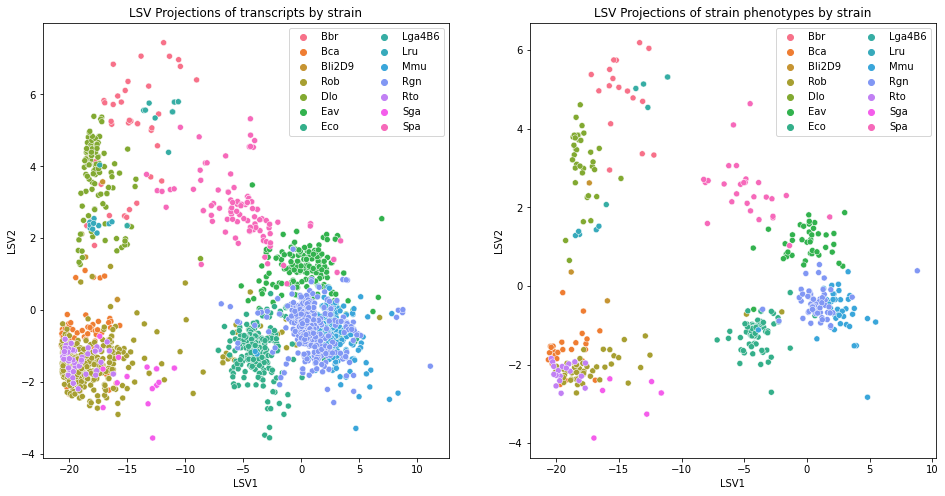

In [12]:
#Feature projections for transcripts and phenotypes by strain 
u_tr,s_tr,vh_tr = svd(bpm_filt_log_df)
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)
eigenvalues_tr = s_tr**2/(len(s_tr)-1)
expl_variance_tr = eigenvalues_tr / np.sum(eigenvalues_tr)
eigenvalues_pht = s_pht**2/(len(s_pht)-1)
expl_variance_pht = eigenvalues_pht / np.sum(eigenvalues_pht)
pc_indices = [0,1]
feature_projections_tr = sv_projections(bpm_filt_log_df,u_tr,s_tr,vh_tr,axis=1,pc_indices=pc_indices)
feature_projections_pht = sv_projections(condensed_agg_log_df,u_pht,s_pht,vh_pht,axis=1,pc_indices=pc_indices)

fp_tr = pd.DataFrame(data=feature_projections_tr.T,columns=["LSV1","LSV2"])
fp_tr.set_index(bpm_filt_log_df.columns,inplace=True)
fp_pht = pd.DataFrame(data=feature_projections_pht.T,columns=["LSV1","LSV2"])
fp_pht.set_index(condensed_agg_log_df.columns,inplace=True)


#Add in mcseed annotations for strain and phenotype
# fp_tr.loc[:,"Strain"] = mcseed_df.loc[fp_tr.index,"Isolate name"]
mcseed_filt = mcseed_df.loc[mcseed_df.index.isin(fp_tr.index),:]
fp_tr_mcseed_join = fp_tr.merge(right=mcseed_filt,left_index=True,right_index=True,sort=True)
fp_tr_mcseed = fp_tr_mcseed_join.loc[fp_tr.index].drop_duplicates()
# display(fp_tr_mcseed)

strain_palette = sns.color_palette("husl", len(fp_tr_mcseed["Isolate name"].unique()))
fig,axes = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = axes
sns.scatterplot(data=fp_tr_mcseed,x="LSV1",y="LSV2",ax=ax1,
                palette=strain_palette,hue="Isolate name")
handles,labels = ax1.get_legend_handles_labels()
abbrev_labels = [STRAIN_TAGS[l] for l in labels]
ax1.legend(handles,abbrev_labels,ncol=2)
ax1.set_title("LSV Projections of transcripts by strain")
#Display
# display(fp_tr)
# display(fp_pht)
fp_pht_mcseed = fp_pht.copy()
fp_pht_mcseed.loc[:,"Strain abbreviation"] = fp_pht_mcseed.index.str.extract("(\w+?)\_[\w\-]+",expand=False)
fp_pht_mcseed.loc[:,"Phenotype"] = fp_pht_mcseed.index.str.extract("\w+?\_([\w\-]+)",expand=False)
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax2,
                palette=strain_palette,hue="Strain abbreviation")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels,loc="best",ncol=2)
ax2.set_title("LSV Projections of strain phenotypes by strain")
plt.savefig("{0}/feature_projections_SVD.png".format(figures_dir),dpi=200,bbox_inches="tight",facecolor="white")

,LSV1,LSV2,Strain abbreviation,Phenotype,Functional category
Bbr_Glc,-15.764702,5.089090,Bbr,Glc,Carbohydrate utilization
Bbr_NANA,-15.739655,2.947481,Bbr,NANA,Carbohydrate utilization
Bbr_Fuc,-13.102957,4.694377,Bbr,Fuc,Carbohydrate utilization
Bbr_Mal,-15.655304,4.123402,Bbr,Mal,Carbohydrate utilization
Bbr_Lnb,-12.603777,6.041711,Bbr,Lnb,Carbohydrate utilization
...,...,...,...,...,...
Spa_Acetate,-3.823994,1.684812,Spa,Acetate,Fermentation products
Spa_Formate,-4.771953,2.100623,Spa,Formate,Fermentation products
Spa_L-Lactate,-2.791990,2.215797,Spa,L-Lactate,Fermentation products
Spa_Ethanol,-5.035315,2.626703,Spa,Ethanol,Fermentation products


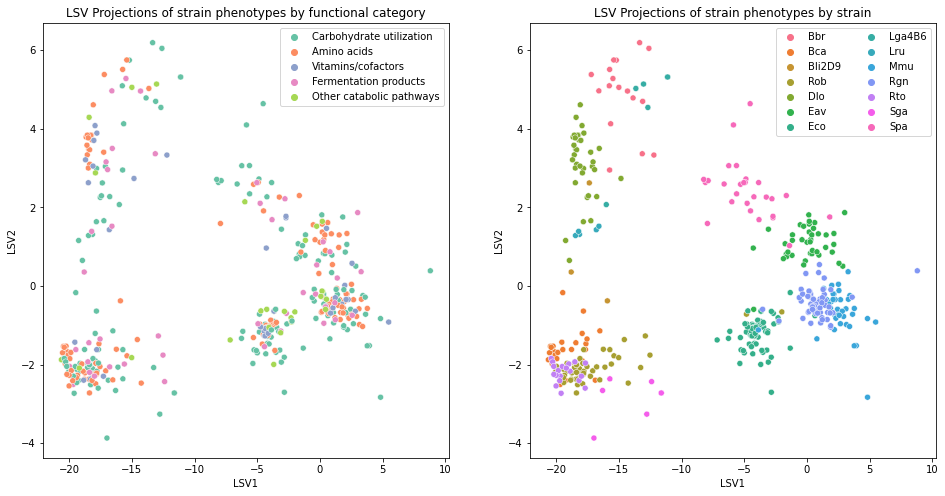

In [13]:
#Mapping pathways back to functional categories 
#Use mcseed_df (without list version phenotypes) for list of phenotype unique values 
pht_fc_dict = {}
for pht_str in mcseed_df["Phenotype"].unique(): #pht_str is a variable length semicolon separated string of different phenotypes
    pht_list = pht_str.split(";") 
    pht_str_rows = mcseed_df.loc[mcseed_df["Phenotype"]==pht_str,:]
    assert(len(pht_str_rows["Functional category"].unique()) == 1)
    fc_cat_str = pht_str_rows["Functional category"].iloc[0]
    fc_cat_list = fc_cat_str.split(";")
    for i,pht in enumerate(pht_list):
        if pht not in pht_fc_dict:
            if len(fc_cat_list) == 1: #If only one functional category for all entries in pht_str, use that category
                pht_fc_dict[pht] = fc_cat_list[0]
            elif len(fc_cat_list) == len(pht_list): #If one-to-one mapping of phenotypes to functional categories, go in order
                pht_fc_dict[pht] = fc_cat_list[i]
            else: #Not one-to-one mapping of phenotypes to functional categories; use some HARD CODING TM  
                print(pht_str)
                print(fc_cat_str)
                raise ValueError("Cannot automatically match phenotypes to functional categories based on prior entries")

fp_pht_mcseed.loc[:,"Functional category"] = fp_pht_mcseed["Phenotype"].map(pht_fc_dict)
display(fp_pht_mcseed)

n_fc_unique = len(fp_pht_mcseed["Functional category"].unique())
# fc_palette = sns.color_palette("husl", n_fc_unique)
fc_palette = sns.color_palette("Set2")[:n_fc_unique]
fig,axes = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = axes
#Strain phenotypes by functional category
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax1,
                palette=fc_palette,hue="Functional category")
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles,labels,loc="best")
ax1.set_title("LSV Projections of strain phenotypes by functional category")
#Strain phenotypes by strain
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax2,
                palette=strain_palette,hue="Strain abbreviation")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels,loc="best",ncol=2)
ax2.set_title("LSV Projections of strain phenotypes by strain")
plt.savefig("{0}/feature_projections_SVD.png".format(figures_dir),dpi=200,bbox_inches="tight",facecolor="white")

plt.savefig("{0}/phenotypes_functionalcategory_SVD.png".format(figures_dir),dpi=200,bbox_inches="tight",facecolor="white")


Explained Variance (Transcripts, first 2): [0.91698847 0.0246164 ]
Explained Variance (Phenotype, first 2): [0.91401062 0.0296341 ]
LSV1 Transcript
[-0.21971702 -0.18010869 -0.23042857 -0.22791743 -0.22379315 -0.16755403
 -0.22121045 -0.20107081  0.32923792 -0.21619382  0.32060288  0.32765006
  0.24546969  0.32741202  0.3376214 ]
RSV1 Transcript
[-0.032243   -0.02960579 -0.03222824 ... -0.00923872 -0.01107412
 -0.01177655]
-0.03910159277758576 0.005037890520870739
-0.08112407537559266 0.00819325039552663


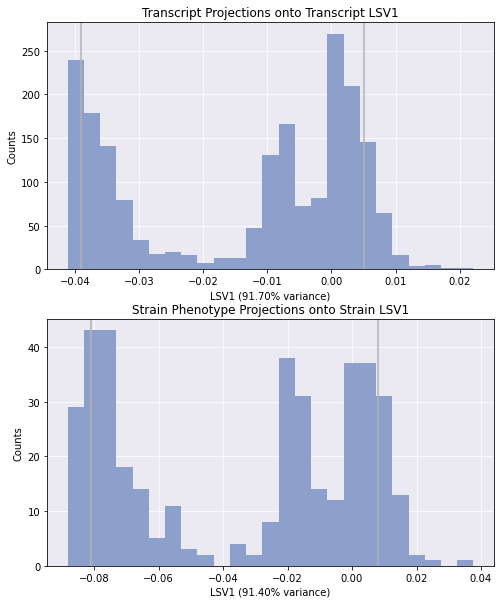

In [14]:
#SVD Feature Comparison 
u_tr,s_tr,vh_tr = svd(bpm_filt_log_df)
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)

#Explained variance calculated from s -> eigenvalues 
eigenvalues_tr = s_tr**2/(len(s_tr)-1)
expl_variance_tr = eigenvalues_tr / np.sum(eigenvalues_tr)
eigenvalues_pht = s_pht**2/(len(s_pht)-1)
expl_variance_pht = eigenvalues_pht / np.sum(eigenvalues_pht)

n_SV = 2
print("Explained Variance (Transcripts, first {0}): {1}".format(n_SV,expl_variance_tr[:n_SV]))
print("Explained Variance (Phenotype, first {0}): {1}".format(n_SV,expl_variance_pht[:n_SV]))

LSV1_tr = u_tr[:,0]
RSV1_tr = vh_tr[0,:]

print("LSV1 Transcript")
print(LSV1_tr)
print("RSV1 Transcript")
print(RSV1_tr)

LSV1_pht = u_pht[:,0]
RSV1_pht = vh_pht[0,:]

tr_10th, tr_90th = np.percentile(RSV1_tr,[10,90])
print(tr_10th,tr_90th)
pht_10th, pht_90th = np.percentile(RSV1_pht,[10,90])
print(pht_10th,pht_90th)
hist_color = sns.color_palette("Set2")[2]
vline_color = sns.color_palette("Set2")[7]
#Subplots and axes set up, grids, titles, x_labels with PC
fig,axes = plt.subplots(2,1,figsize=(8,10))
ax1,ax2 = axes
for ax in [ax1,ax2]:
    ax.grid(visible=True,color="white")
    ax.set_axisbelow(True)
    ax.set_facecolor("#EBEAF2")
    ax.set_ylabel("Counts")
ax1.set_title("Transcript Projections onto Transcript LSV1")
ax1.set_xlabel("LSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance_tr[pc_indices[0]]*100)))
ax2.set_title("Strain Phenotype Projections onto Strain LSV1")
ax2.set_xlabel("LSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance_pht[pc_indices[0]]*100)))
#Histogram and vline plotting for histogram 10th and 90th percentiles 
ax1.hist(RSV1_tr.flatten(),bins=25,color=hist_color)
ax1_ylim = ax1.get_ylim()
ax1.vlines([tr_10th,tr_90th],*ax1.get_ylim(),color=vline_color,linewidth=1.5)
ax1.set_ylim(ax1_ylim) #without this line vlines resets ylims for some reason - specific to using hist 
ax2.hist(RSV1_pht.flatten(),bins=25,color=hist_color)
ax2_ylim = ax2.get_ylim()
ax2.vlines([pht_10th,pht_90th],*ax2.get_ylim(),color=vline_color,linewidth=1.5)
ax2.set_ylim(ax2_ylim)

plt.savefig("{0}/LSV1_projection_histogram.png".format(figures_dir),dpi=200,bbox_inches="tight",facecolor="white")

In [15]:
#Test cell - comparing s*SV (ie singular value weighted SVs) for PERMANOVA 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
###Phenotypes###
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)
pc_indices = [0,1]
sample_projections = sv_projections(condensed_agg_log_df,u_pht,s_pht,vh_pht,pc_indices=pc_indices)
s_PCs = s_pht[pc_indices]
scaled_projections = np.dot(np.diag(s_PCs),sample_projections) #nPCs x n_samples

v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
v2 = scaled_projections.T #n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))
skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

sp_dm_scaled = sk_distance.DistanceMatrix(distance_matrix(v2,v2,p=2))
skpa_scaled = sk_distance.permanova(distance_matrix=sp_dm_scaled,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa_scaled)
###Transcripts###

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            36.818696
p-value                      0.0005
number of permutations       100000
Name: PERMANOVA results, dtype: object

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            41.670432
p-value                     0.00046
number of permutations       100000
Name: PERMANOVA results, dtype: object

In [ ]:
#HOSVD using log transformed transcript data, phenotype aggregated